## NAME : ADITHYA  ANILKUMAR
### GROUP : 25

In [1]:
## Import all the libraires 
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot
import seaborn as sns
from sklearn.model_selection import * 
from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.feature_extraction import *
from sklearn.feature_selection import *
from sklearn.metrics import *

from sklearn.preprocessing import *
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
#from keras.models import Sequential
#from keras.layers import Dense
import itertools
import warnings
warnings.filterwarnings("ignore")

from joblib import Parallel, delayed


In [2]:
df=pd.read_csv("C:/Users/Rishi/Downloads/heart.csv")

In [3]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Check for Duplicate data

In [6]:
## To check duplicate data in the dataset
df.duplicated().sum()

1

In [7]:
## To drop Duplicate items
df.drop_duplicates(inplace=True)

## Check for Missing values

In [8]:
df.isnull().sum().sum()

0

In [9]:
df.shape

(302, 14)

In [10]:
#Descriptive Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trtbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalachh,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exng,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


(1    164
 0    138
 Name: output, dtype: int64,
 <AxesSubplot:xlabel='output', ylabel='count'>)

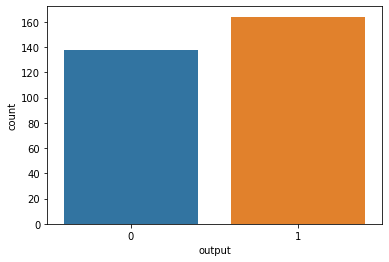

In [11]:
df["output"].value_counts(),sns.countplot(x=df["output"])

In [12]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [13]:
cat_features=["sex","exng","cp","fbs","restecg","slp","thall"]
# categorical features dataframe
df_cat=df[cat_features]
# Numerical features dataframe
df_num=df.drop(cat_features,axis=1)

In [14]:
## Categorical  data
df_cat

,sex,exng,cp,fbs,restecg,slp,thall
0,1,0,3,1,0,0,1
1,1,0,2,0,1,0,2
2,0,0,1,0,0,2,2
3,1,0,1,0,1,2,2
4,0,1,0,0,1,2,2
...,...,...,...,...,...,...,...
298,0,1,0,0,1,1,3
299,1,0,3,0,1,1,3
300,1,0,0,1,1,1,3
301,1,1,0,0,1,1,3


In [15]:
# Numerical data
df_num

,age,trtbps,chol,thalachh,oldpeak,caa,output
0,63,145,233,150,2.3,0,1
1,37,130,250,187,3.5,0,1
2,41,130,204,172,1.4,0,1
3,56,120,236,178,0.8,0,1
4,57,120,354,163,0.6,0,1
...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,0
299,45,110,264,132,1.2,0,0
300,68,144,193,141,3.4,2,0
301,57,130,131,115,1.2,1,0


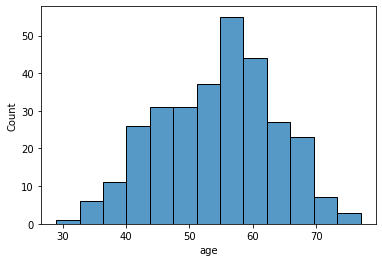

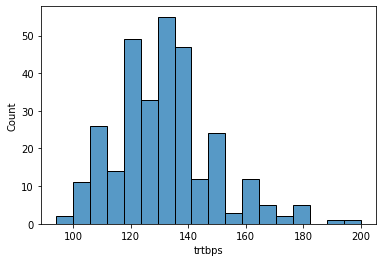

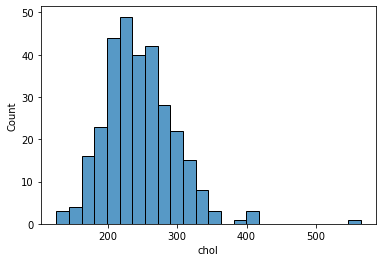

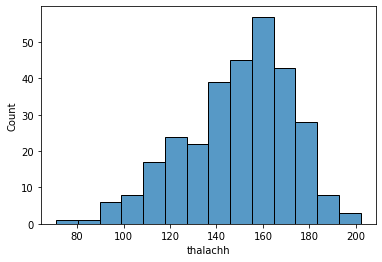

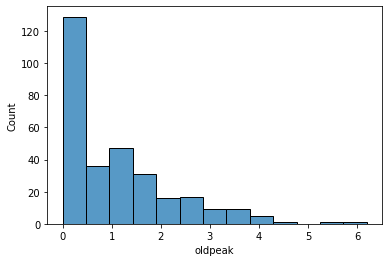

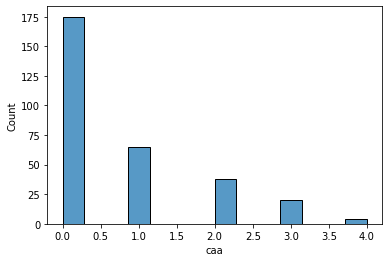

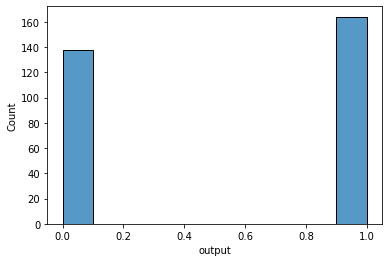

In [16]:
import matplotlib.pyplot as plt
for i in df_num.columns:
    sns.histplot(data=df_num,x=i)
    plt.show()

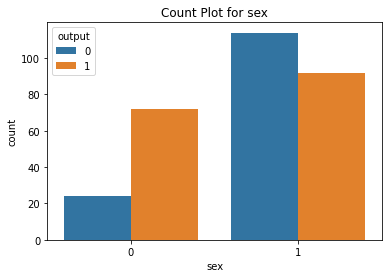

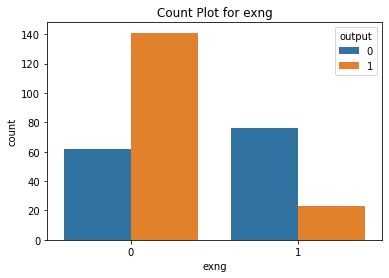

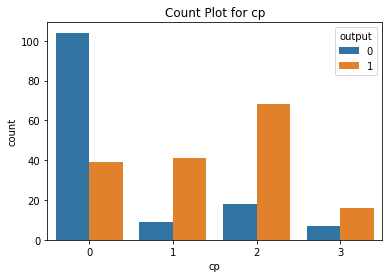

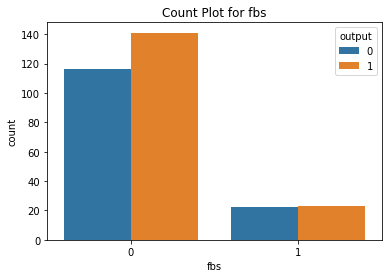

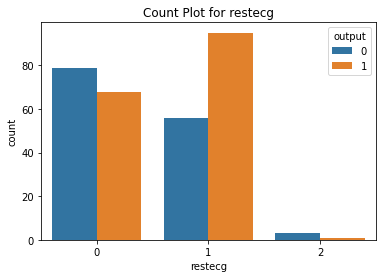

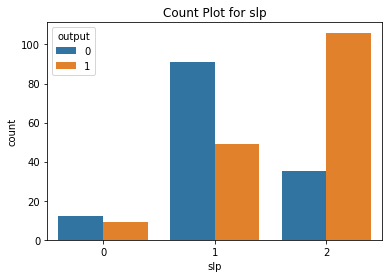

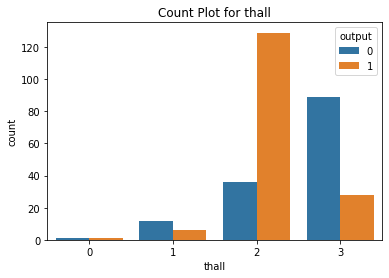

In [17]:
for i in df_cat.columns:
    plt.figure()  # Create a new figure for each plot
    sns.countplot(data=df, x=i, hue="output")
    plt.title(f'Count Plot for {i}')
    plt.show()

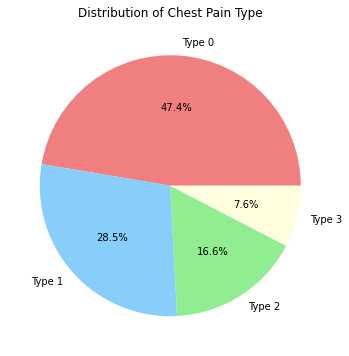

In [18]:
plt.figure(figsize=(6, 6))
labels = ['Type 0', 'Type 1', 'Type 2', 'Type 3']
sizes = df['cp'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue', 'lightgreen', 'lightyellow'])
plt.title('Distribution of Chest Pain Type')
plt.show()

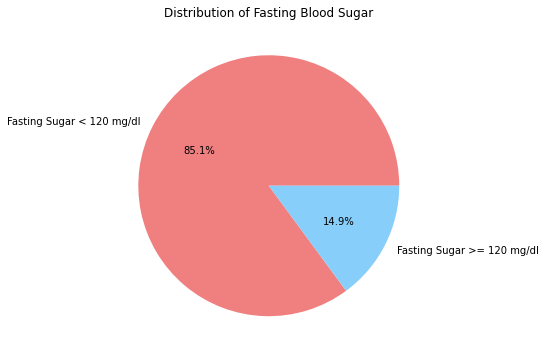

In [19]:
plt.figure(figsize=(6, 6))
labels = ['Fasting Sugar < 120 mg/dl', 'Fasting Sugar >= 120 mg/dl']
sizes = df['fbs'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Distribution of Fasting Blood Sugar')
plt.show()

In [20]:
# Create a contingency table
#A contingency table is a type of table that summarizes the relationship between two categorical variables.
contingency_table = pd.crosstab([df['fbs'], df['cp']], df["output"])
contingency_table 

output   0   1
fbs cp        
0   0   87  38
    1    8  37
    2   15  54
    3    6  12
1   0   17   1
    1    1   4
    2    3  14
    3    1   4

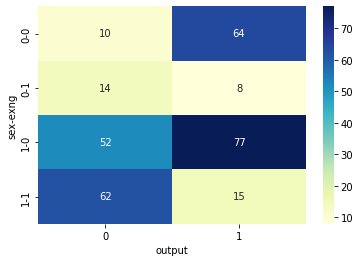

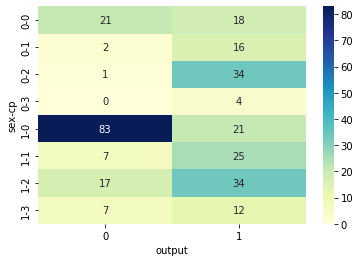

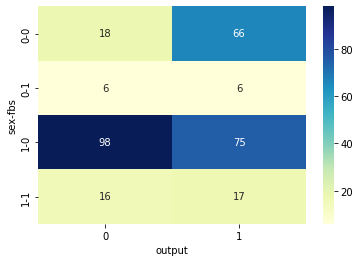

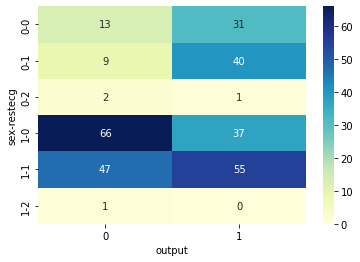

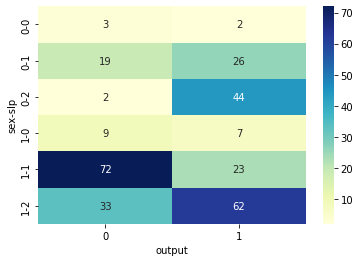

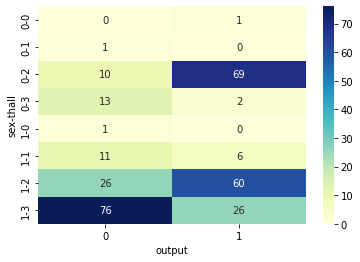

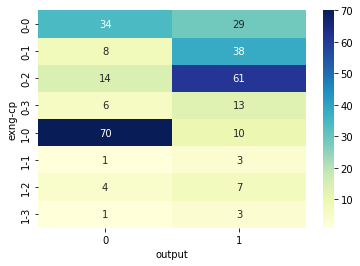

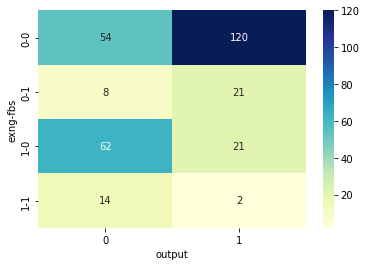

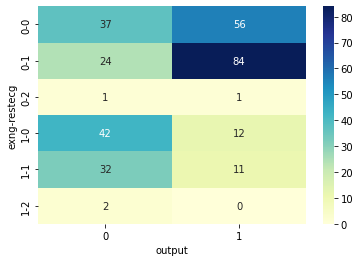

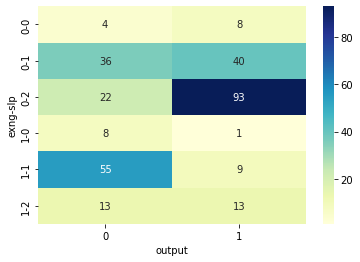

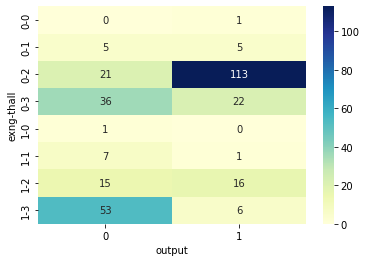

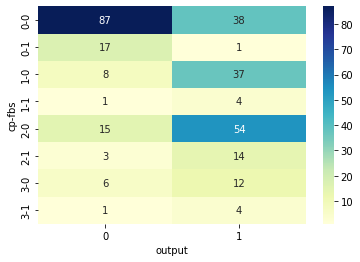

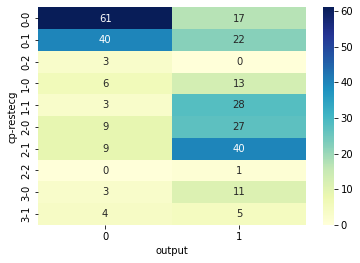

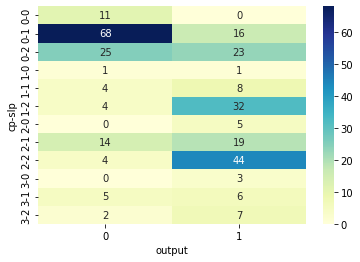

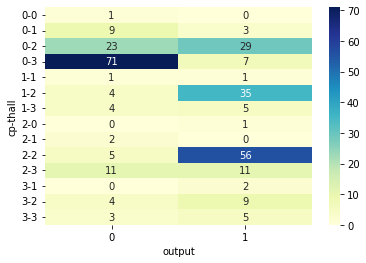

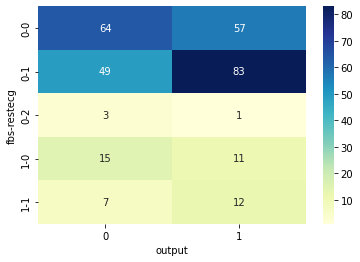

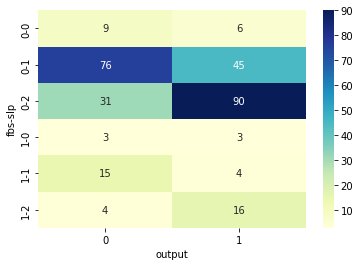

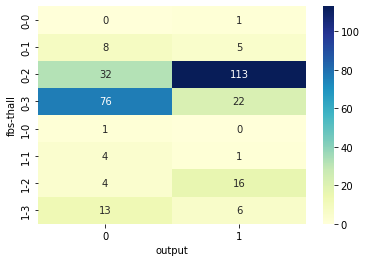

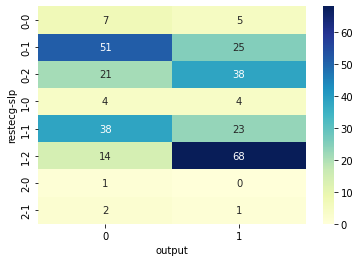

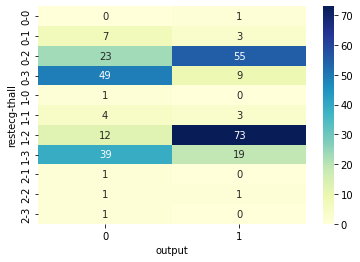

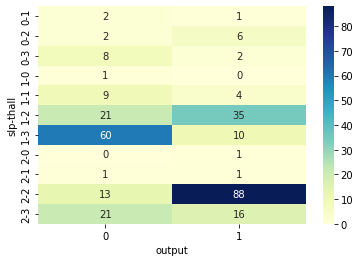

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

for feature_pair in itertools.combinations(df_cat.columns, 2):    
    feature1, feature2 = feature_pair
    # Create a contingency table for 2 categorical features and set output feature as hue
    contingency_table = pd.crosstab([df[feature1], df[feature2]], df["output"])
    sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt="d")
    plt.show()


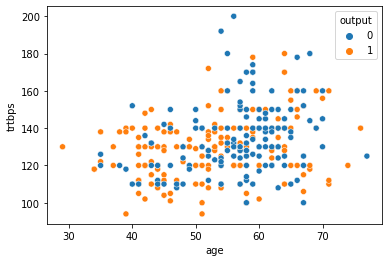

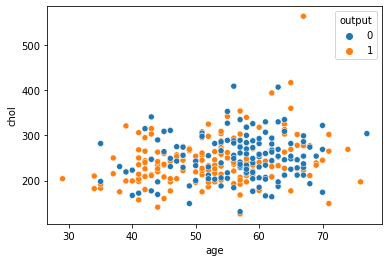

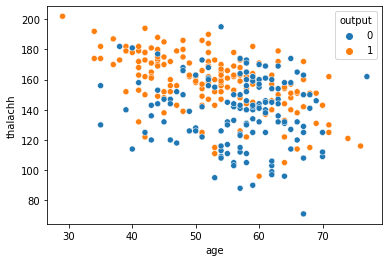

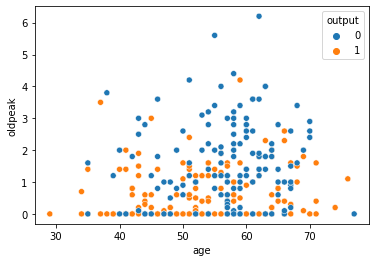

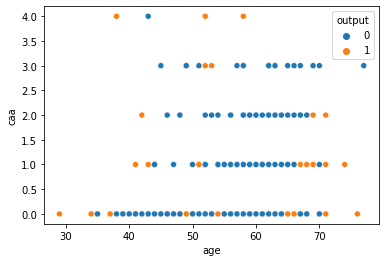

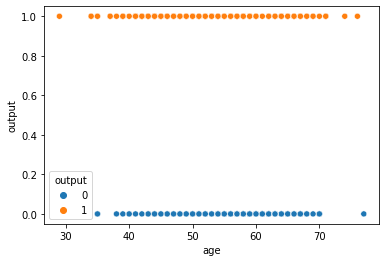

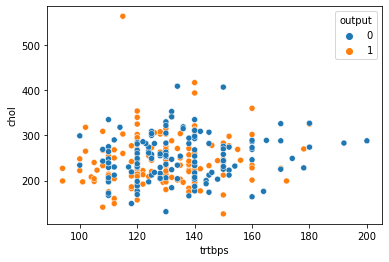

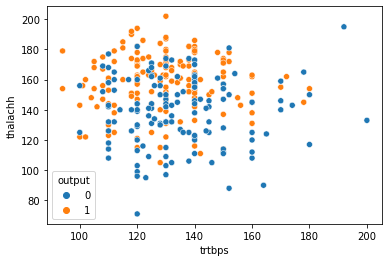

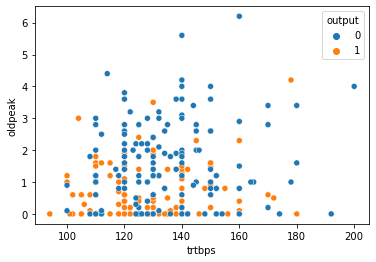

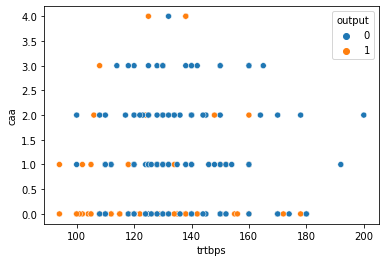

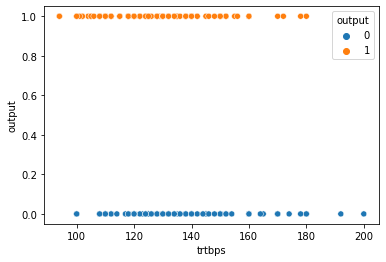

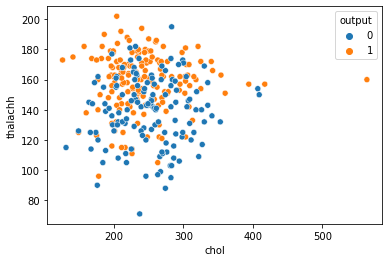

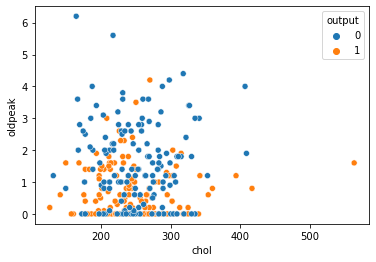

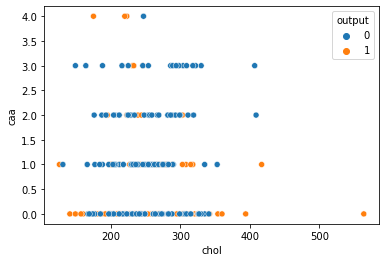

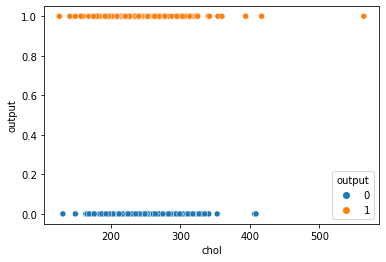

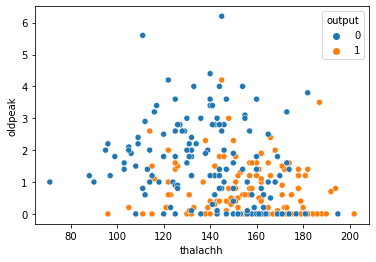

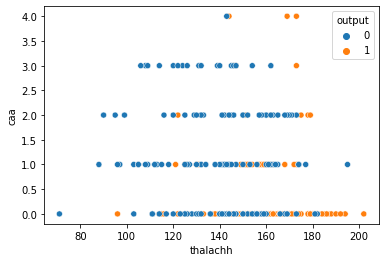

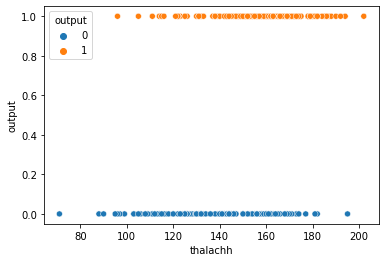

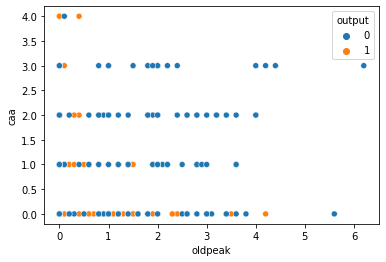

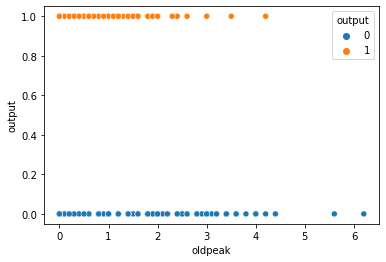

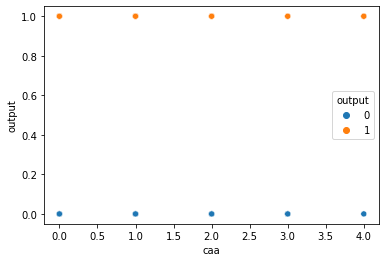

In [22]:
import itertools

# For Bivariate analysis and to visualize the scatter plot between 2 features
# itertools.combinations function to generate all unique pairs of features 
for feature_pair in itertools.combinations(df_num.columns, 2):
    feature1, feature2 = feature_pair
    sns.scatterplot(data=df, x=feature1, y=feature2, hue="output")
    plt.show()

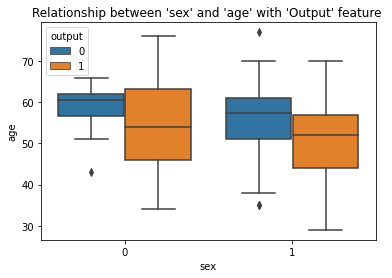

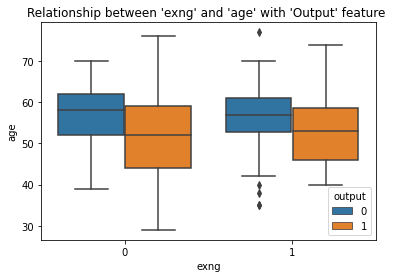

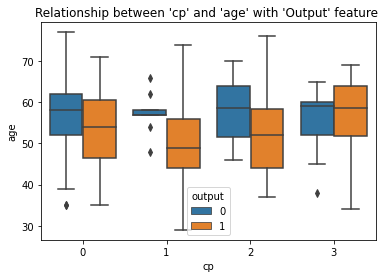

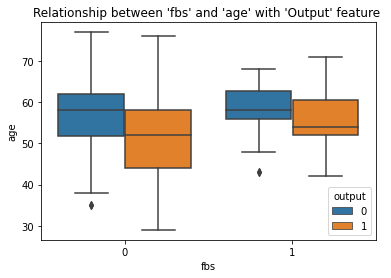

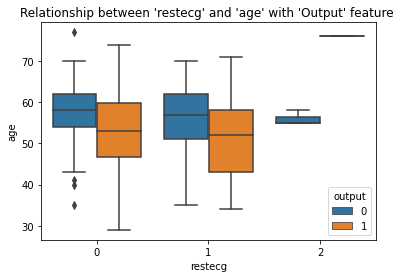

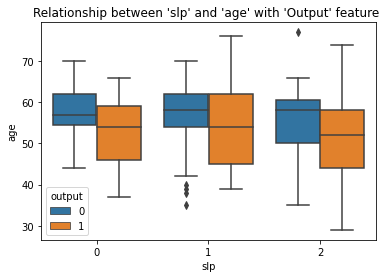

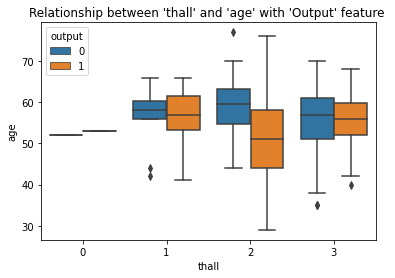

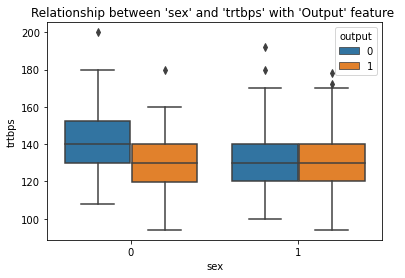

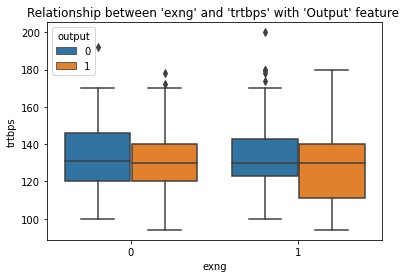

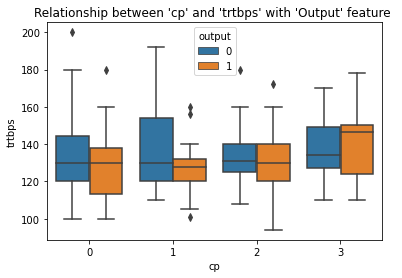

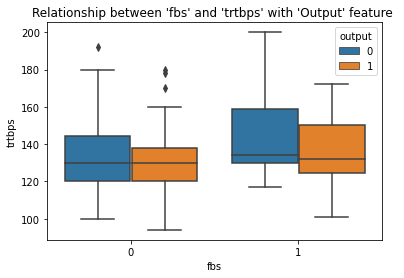

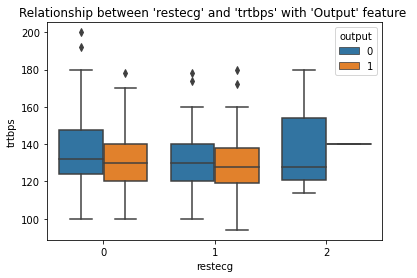

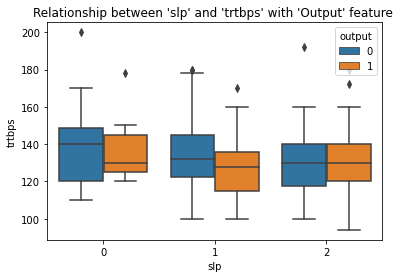

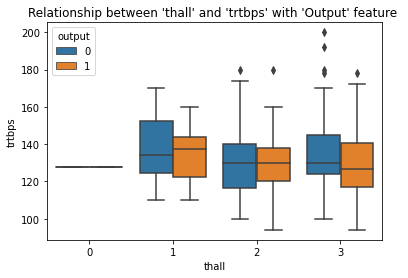

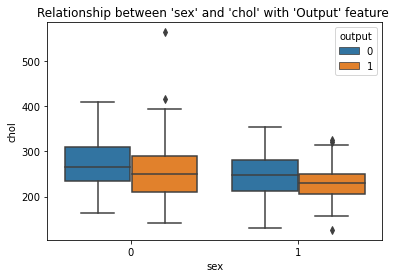

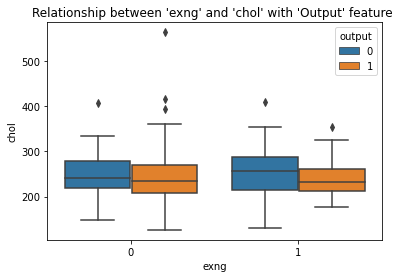

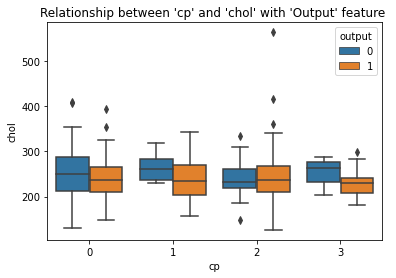

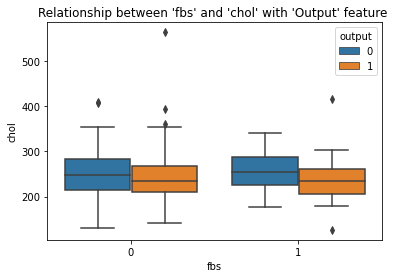

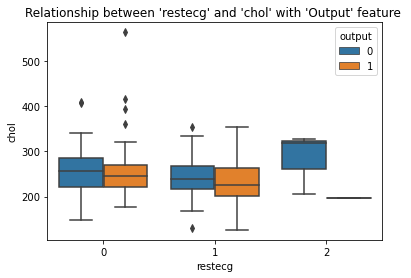

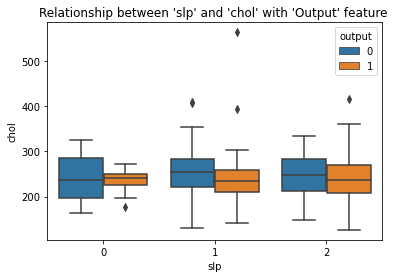

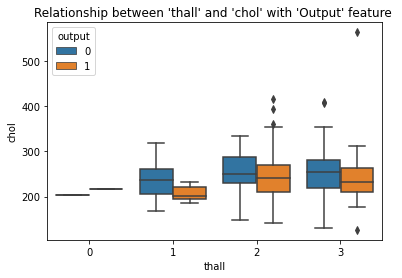

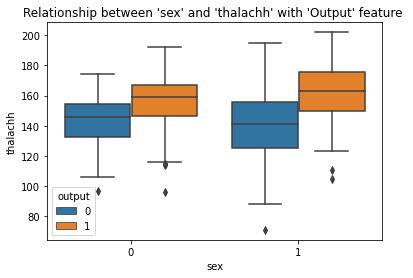

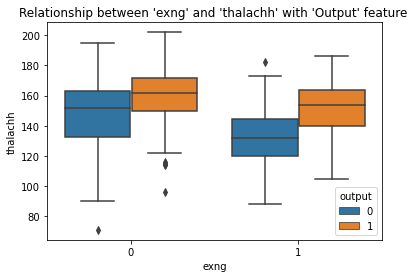

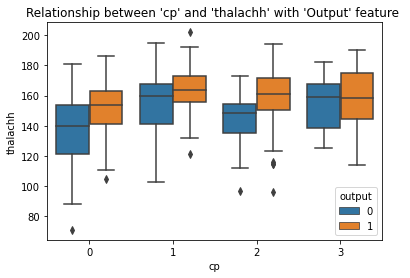

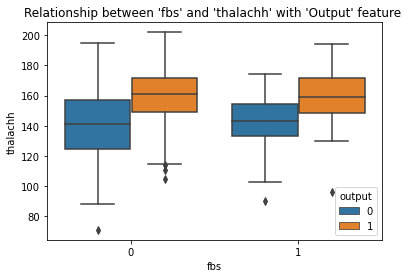

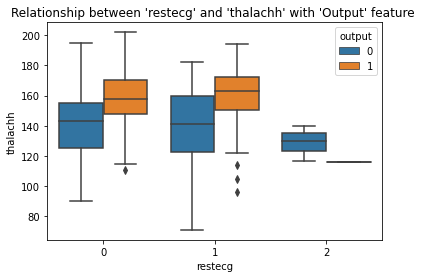

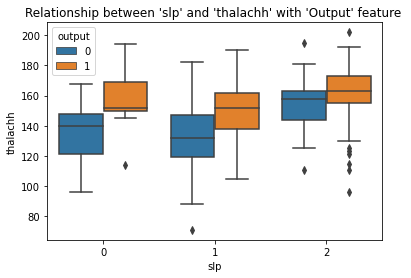

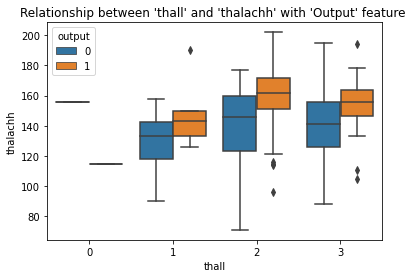

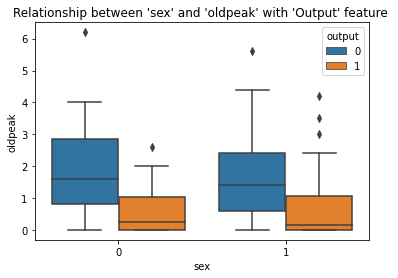

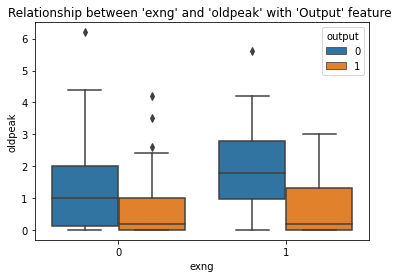

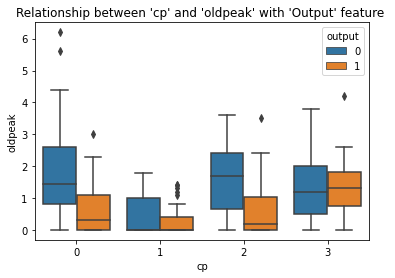

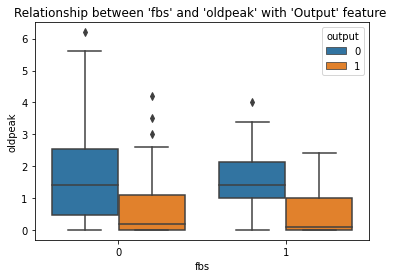

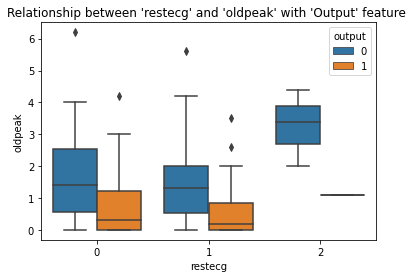

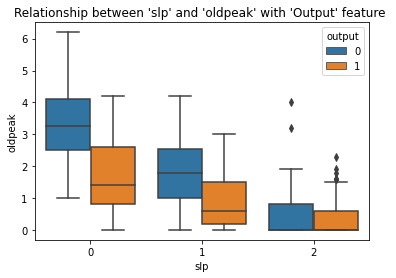

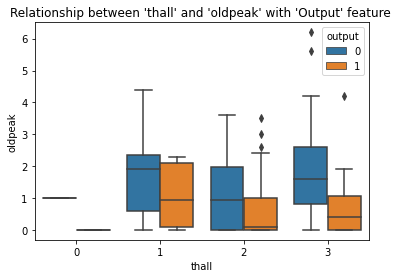

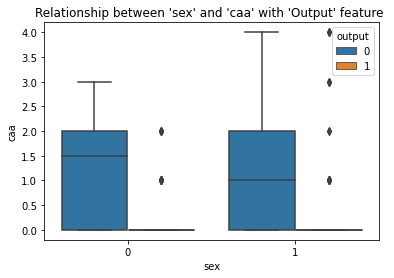

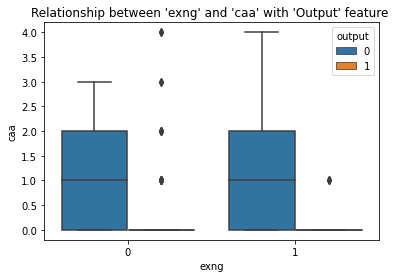

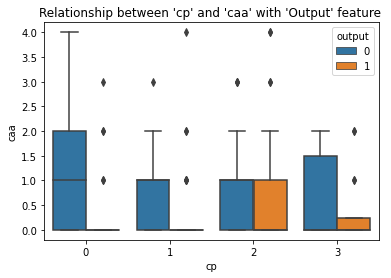

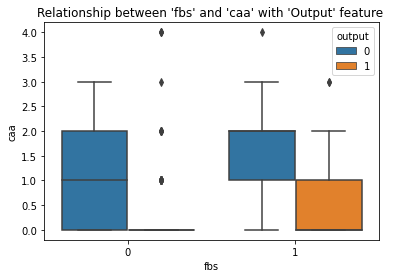

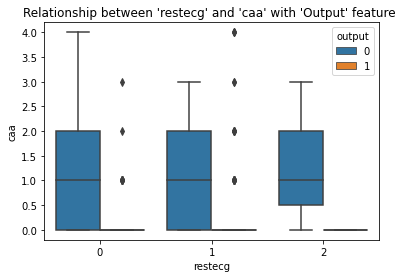

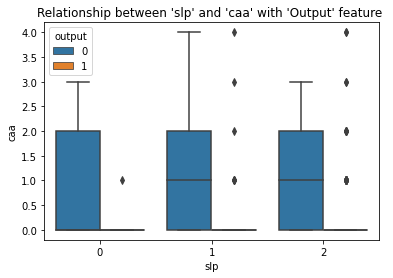

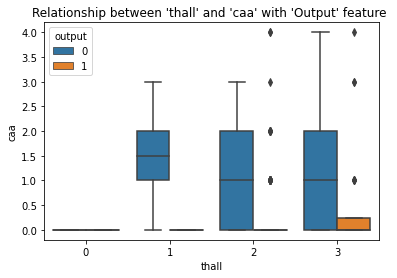

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in df_num.columns:
    for j in df_cat.columns:
# Create a box plot with hue
        if i!="output":
            sns.boxplot(data=df, x=j, y=i, hue="output")
            plt.title(f"Relationship between '{j}' and '{i}' with 'Output' feature ")
            plt.show()


## To check for MultiCollinearity 

<AxesSubplot:>

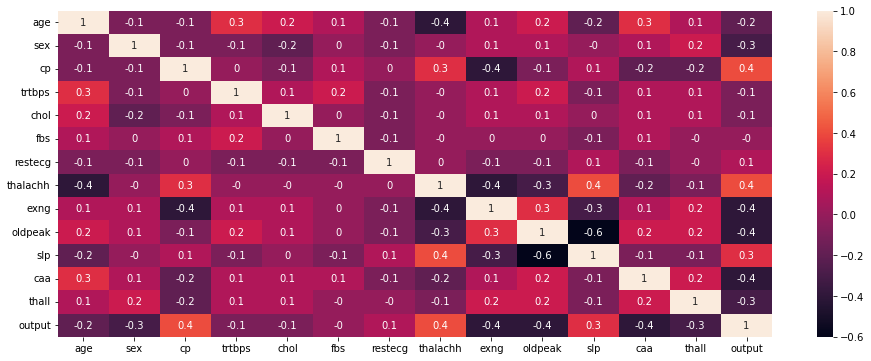

In [24]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(16, 6))
# Create a heatmap of the correlation matrix with rounded values and annotations
sns.heatmap(data=round(df.corr(), 1), annot=True, ax=ax)

In [25]:
X=df.drop("output",axis=1)
y=df["output"]

## To Data Splitting

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42, shuffle=True, stratify=y)

In [27]:
y_train.value_counts(),y_test.value_counts()

(1    115
 0     96
 Name: output, dtype: int64,
 1    49
 0    42
 Name: output, dtype: int64)

In [28]:
## Lets check the percntage of class 1 in train data
print((y_train.value_counts()[1]/len(y_train)))

## Lets check the percntage of class 1 in test data
print((y_test.value_counts()[1]/len(y_test)))

0.5450236966824644
0.5384615384615384


We can see that, the train and test data has same pecentage of target class


In [29]:
## Check the shape of train and test data
(X_train.shape),(y_train.shape),(X_test.shape),(y_test.shape)

((211, 13), (211,), (91, 13), (91,))

## Pipeline

In [30]:
preprocessing = ColumnTransformer([
    ("One Hot Encoding", OneHotEncoder(), df_cat.columns),  # For categorical features
    ("Scalers", StandardScaler(), df_num.drop("output", axis=1).columns)  # For numeric features
],remainder ='passthrough')

# Create the model pipeline
model = Pipeline([
    ("preprocessing", preprocessing),
    ("Logistic Regression", LogisticRegression())
])

In [31]:
from sklearn import set_config
## This is the sample pipeline  for preprocessing (using standard scaler) and model is Logistic Regression
model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One Hot Encoding',
                                                  OneHotEncoder(),
                                                  Index(['sex', 'exng', 'cp', 'fbs', 'restecg', 'slp', 'thall'], dtype='object')),
                                                 ('Scalers', StandardScaler(),
                                                  Index(['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'caa'], dtype='object'))])),
                ('Logistic Regression', LogisticRegression())])

#### This is the pipeline  architecture for the  model 


In [32]:
model.named_steps

{'preprocessing': ColumnTransformer(remainder='passthrough',
                   transformers=[('One Hot Encoding', OneHotEncoder(),
                                  Index(['sex', 'exng', 'cp', 'fbs', 'restecg', 'slp', 'thall'], dtype='object')),
                                 ('Scalers', StandardScaler(),
                                  Index(['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'caa'], dtype='object'))]),
 'Logistic Regression': LogisticRegression()}

# 1) Experiment- 1
- Preprocessing Pipeline
    -  One-Hot Encoding for Categorical columns.
    - and Different Scaling Technique for scaling.
- Final Pipeline
    -  Preprocessed data will go to model.

In [33]:
def Evaluate_results1(X_train,X_test,y_train,y_test,scaler_name,scaler,Model_Name,Model,df_cat,df_num):
    """
    Run a classification experiment, calculate various performance metrics

    Args:
        X_train (DataFrame): Training feature data.
        X_test (DataFrame): Test feature data.
        y_train (Series): Training labels.
        y_test (Series): Test labels.
        scaler_name (str): Name of the scaler to be used for data scaling.
        Model_name (str): Name of the classification algorithm.
        Model (estimator): The classification algorithm (e.g., RandomForestClassifier or Logistic Regression).

    Returns:
        dict: A dictionary containing various experiment results and metrics.
        
    """
    
    # Fit the pipeline to your training data
    # Define the preprocessing steps using ColumnTransformer
    preprocessing = ColumnTransformer([
    ("One Hot Encoding", OneHotEncoder(drop="first"), df_cat.columns),  # For categorical features
    (scaler_name, scaler, df_num.drop("output", axis=1).columns)  # For numeric features
    ],remainder="passthrough")
    
    #preprocessing.fit_transform(X_train,y_train)
    # Create the model pipeline
    model = Pipeline([
        ("preprocessing", preprocessing),
        ("Model_Name", Model)
    ])
    
    ## Fit the Training data for the pipeline
    model.fit(X_train,y_train)
    ## get the predictions for test data
    y_pred=model.predict(X_test)
    
    ## Calculate the performance of model
    accuracy= accuracy_score(y_test, y_pred)
    F1_score=f1_score(y_test, y_pred)
    report=classification_report(y_test, y_pred, labels=[0,1])
    CM = confusion_matrix(y_test, y_pred, labels=model.classes_)
    precision=precision_score(y_test, y_pred)
    recall=recall_score(y_test, y_pred)
    roc_auc_Score=roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    ## To show confusion matrix
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    #disp.plot()
    #plt.show()  
    
    return {
            "Model Name":Model_Name,
            "Scaling": scaler_name,
            "Accuracy":accuracy,
            "F1_score":F1_score,
            "Confusion matrix":CM,
            "TN" : CM[0][0],
            "FN" : CM[1][0],
            "TP" : CM[1][1],
            "FP" : CM[0][1],
            "Precision":precision,
            "Recall":recall ,
            "ROC_AUC_Score": roc_auc_Score
    }        

In [34]:
 ## For Base Model selection
Models = {

    "entropy splitting Decision Tree": DecisionTreeClassifier(criterion="entropy"),
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True),
    
    }
    
# Define the different scalers for feature scaling 
scalers = {
    "Standard Scaler": StandardScaler(),
    "Min-Max Scaler": MinMaxScaler(),
    "Robust Scaler": RobustScaler()
}

In [35]:
   ## Ensemble methods
   # ("Stacking Classifier", StackingClassifier(estimators=[])),  # Add your stacked estimators inside the list
   # ("Voting Classifier", VotingClassifier(estimators=[]))

In [36]:
# Use parallel computing to evaluate combinations of scalers and models
results_exp1 = Parallel(n_jobs=-1)(delayed(Evaluate_results1)(X_train, X_test, y_train, y_test, scaler_name, scaler, Model_Name, Model,df_cat,df_num) 
                              for scaler_name, scaler in scalers.items() for Model_Name, Model in Models.items())

In [37]:
data_exp1=pd.DataFrame(results_exp1)


In [38]:
data_exp1

,Model Name,Scaling,Accuracy,F1_score,Confusion matrix,TN,FN,TP,FP,Precision,Recall,ROC_AUC_Score
0,entropy splitting Decision Tree,Standard Scaler,0.780220,0.800000,"[[31, 11], [9, 40]]",31,9,40,11,0.784314,0.816327,0.777211
1,Logistic Regression,Standard Scaler,0.780220,0.803922,"[[30, 12], [8, 41]]",30,8,41,12,0.773585,0.836735,0.888241
2,K-Nearest Neighbors,Standard Scaler,0.791209,0.808081,"[[32, 10], [9, 40]]",32,9,40,10,0.800000,0.816327,0.865889
3,Support Vector Machine,Standard Scaler,0.824176,0.849057,"[[30, 12], [4, 45]]",30,4,45,12,0.789474,0.918367,0.909135
4,entropy splitting Decision Tree,Min-Max Scaler,0.780220,0.807692,"[[29, 13], [7, 42]]",29,7,42,13,0.763636,0.857143,0.773810
5,Logistic Regression,Min-Max Scaler,0.802198,0.823529,"[[31, 11], [7, 42]]",31,7,42,11,0.792453,0.857143,0.884840
6,K-Nearest Neighbors,Min-Max Scaler,0.769231,0.787879,"[[31, 11], [10, 39]]",31,10,39,11,0.780000,0.795918,0.842080
7,Support Vector Machine,Min-Max Scaler,0.780220,0.807692,"[[29, 13], [7, 42]]",29,7,42,13,0.763636,0.857143,0.879495
8,entropy splitting Decision Tree,Robust Scaler,0.802198,0.820000,"[[32, 10], [8, 41]]",32,8,41,10,0.803922,0.836735,0.799320
9,Logistic Regression,Robust Scaler,0.780220,0.803922,"[[30, 12], [8, 41]]",30,8,41,12,0.773585,0.836735,0.890185


In [39]:
## To get the best model based on Different Metrics
data_exp1[data_exp1["F1_score"]>0.82]

,Model Name,Scaling,Accuracy,F1_score,Confusion matrix,TN,FN,TP,FP,Precision,Recall,ROC_AUC_Score
3,Support Vector Machine,Standard Scaler,0.824176,0.849057,"[[30, 12], [4, 45]]",30,4,45,12,0.789474,0.918367,0.909135
5,Logistic Regression,Min-Max Scaler,0.802198,0.823529,"[[31, 11], [7, 42]]",31,7,42,11,0.792453,0.857143,0.884840
8,entropy splitting Decision Tree,Robust Scaler,0.802198,0.820000,"[[32, 10], [8, 41]]",32,8,41,10,0.803922,0.836735,0.799320
11,Support Vector Machine,Robust Scaler,0.824176,0.849057,"[[30, 12], [4, 45]]",30,4,45,12,0.789474,0.918367,0.913994


In [40]:
exp1_best_models=data_exp1[data_exp1["F1_score"]>0.82]
# Reset the index
exp1_best_models.reset_index(inplace=True,drop=True)

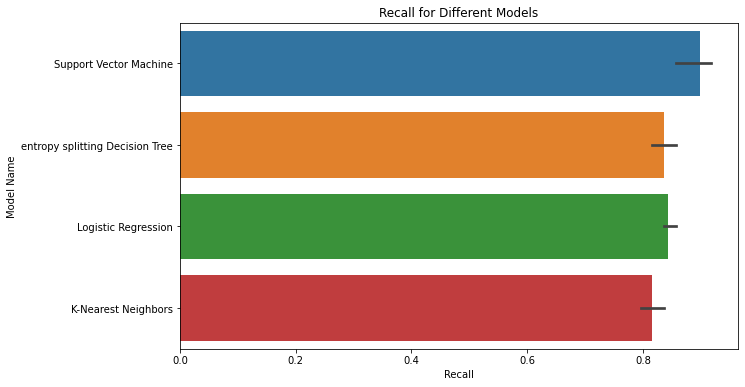

In [41]:
# Sort the DataFrame by Recall in descending order
sorted_data = data_exp1.sort_values(by="Recall", ascending=False)

# Create a bar chart to visualize Recall values
plt.figure(figsize=(10, 6))
sns.barplot(data=sorted_data, x="Recall", y="Model Name")
plt.xlabel("Recall")
plt.ylabel("Model Name")
plt.title("Recall for Different Models")
plt.show()

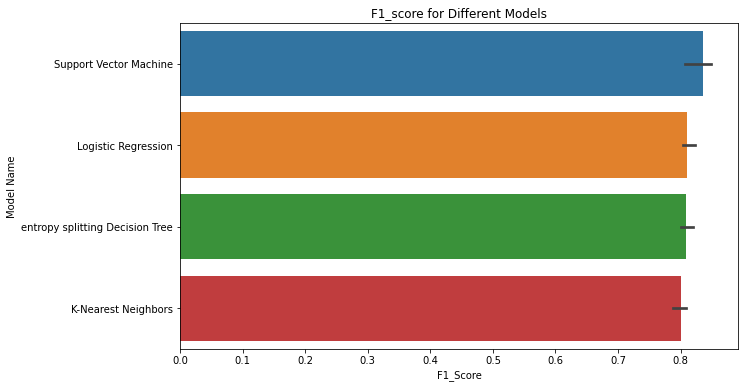

In [42]:
# Sort the DataFrame by Recall in descending order
sorted_data = data_exp1.sort_values(by="F1_score", ascending=False)

# Create a bar chart to visualize Recall values
plt.figure(figsize=(10, 6))
sns.barplot(data=sorted_data, x="F1_score", y="Model Name")
plt.xlabel("F1_Score")
plt.ylabel("Model Name")
plt.title("F1_score for Different Models")
plt.show()

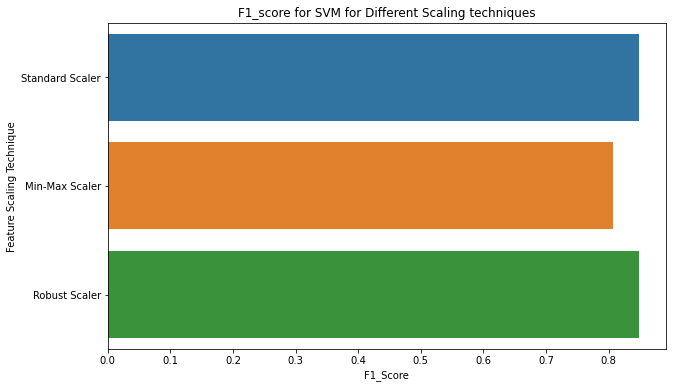

In [43]:
# Create a bar chart to visualize F1-Score values for different Scaling Techniques
plt.figure(figsize=(10, 6))
sns.barplot(data=data_exp1[data_exp1["Model Name"]=="Support Vector Machine"], x="F1_score", y="Scaling")
plt.xlabel("F1_Score")
plt.ylabel("Feature Scaling Technique")
plt.title("F1_score for SVM for Different Scaling techniques")
plt.show()

In [44]:
def Evaluate_results2(X_train,X_test,y_train,y_test,scaler_name,scaler,Model_Name,Model,df_cat,df_num):
    """
    Run a classification experiment, calculate various performance metrics

    Args:
        X_train (DataFrame): Training feature data.
        X_test (DataFrame): Test feature data.
        y_train (Series): Training labels.
        y_test (Series): Test labels.
        scaler_name (str): Name of the scaler to be used for data scaling.
        Model_name (str): Name of the classification algorithm.
        Model (estimator): The classification algorithm (e.g., RandomForestClassifier or Logistic Regression).

    Returns:
        dict: A dictionary containing various experiment results and metrics.
        
    """
    
    # Fit the pipeline to your training data
    # Define the preprocessing steps using ColumnTransformer
    preprocessing = ColumnTransformer([
    (scaler_name, scaler, df_num.drop("output", axis=1).columns)  # For numeric features
    ],remainder="passthrough") # Remained features will pass as it is 
    
    #preprocessing.fit_transform(X_train,y_train)
    # Create the model pipeline
    model = Pipeline([
        ("preprocessing", preprocessing),
        ("Model_Name", Model)
    ])
    
    ## Fit the Training data for the pipeline
    model.fit(X_train,y_train)
    ## get the predictions for test data
    y_pred=model.predict(X_test)
    
    ## Calculate the performance of model
    accuracy= accuracy_score(y_test, y_pred)
    F1_score=f1_score(y_test, y_pred)
    report=classification_report(y_test, y_pred, labels=[0,1])
    CM = confusion_matrix(y_test, y_pred, labels=model.classes_)
    precision=precision_score(y_test, y_pred)
    recall=recall_score(y_test, y_pred)
    roc_auc_Score=roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    ## To show confusion matrix
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    #disp.plot()
    #plt.show()  
    
    return {
            "Model Name":Model_Name,
            "Scaling": scaler_name,
            "Accuracy":accuracy,
            "F1_score":F1_score,
            "Confusion matrix":CM,
            "TN" : CM[0][0],
            "FN" : CM[1][0],
            "TP" : CM[1][1],
            "FP" : CM[0][1],
            "Precision":precision,
            "Recall":recall ,
            "ROC_AUC_Score": roc_auc_Score
    }     


# Use parallel computing to evaluate combinations of scalers and models
results_exp2 = Parallel(n_jobs=-1)(delayed(Evaluate_results2)(X_train, X_test, y_train, y_test, scaler_name, scaler, Model_Name, Model,df_cat,df_num) 
                              for scaler_name, scaler in scalers.items() for Model_Name, Model in Models.items())

data_exp2=pd.DataFrame(results_exp2)
data_exp2

,Model Name,Scaling,Accuracy,F1_score,Confusion matrix,TN,FN,TP,FP,Precision,Recall,ROC_AUC_Score
0,entropy splitting Decision Tree,Standard Scaler,0.802198,0.830189,"[[29, 13], [5, 44]]",29,5,44,13,0.771930,0.897959,0.794218
1,Logistic Regression,Standard Scaler,0.780220,0.807692,"[[29, 13], [7, 42]]",29,7,42,13,0.763636,0.857143,0.880952
2,K-Nearest Neighbors,Standard Scaler,0.791209,0.822430,"[[28, 14], [5, 44]]",28,5,44,14,0.758621,0.897959,0.858358
3,Support Vector Machine,Standard Scaler,0.780220,0.814815,"[[27, 15], [5, 44]]",27,5,44,15,0.745763,0.897959,0.882410
4,entropy splitting Decision Tree,Min-Max Scaler,0.791209,0.819048,"[[29, 13], [6, 43]]",29,6,43,13,0.767857,0.877551,0.784014
5,Logistic Regression,Min-Max Scaler,0.791209,0.822430,"[[28, 14], [5, 44]]",28,5,44,14,0.758621,0.897959,0.875121
6,K-Nearest Neighbors,Min-Max Scaler,0.780220,0.800000,"[[31, 11], [9, 40]]",31,9,40,11,0.784314,0.816327,0.826045
7,Support Vector Machine,Min-Max Scaler,0.813187,0.838095,"[[30, 12], [5, 44]]",30,5,44,12,0.785714,0.897959,0.877551
8,entropy splitting Decision Tree,Robust Scaler,0.769231,0.796117,"[[29, 13], [8, 41]]",29,8,41,13,0.759259,0.836735,0.763605
9,Logistic Regression,Robust Scaler,0.780220,0.807692,"[[29, 13], [7, 42]]",29,7,42,13,0.763636,0.857143,0.881438


In [45]:
## To get the best model based on F1 Score Metrics
data_exp2[data_exp2["F1_score"]>0.82]

,Model Name,Scaling,Accuracy,F1_score,Confusion matrix,TN,FN,TP,FP,Precision,Recall,ROC_AUC_Score
0,entropy splitting Decision Tree,Standard Scaler,0.802198,0.830189,"[[29, 13], [5, 44]]",29,5,44,13,0.771930,0.897959,0.794218
2,K-Nearest Neighbors,Standard Scaler,0.791209,0.822430,"[[28, 14], [5, 44]]",28,5,44,14,0.758621,0.897959,0.858358
5,Logistic Regression,Min-Max Scaler,0.791209,0.822430,"[[28, 14], [5, 44]]",28,5,44,14,0.758621,0.897959,0.875121
7,Support Vector Machine,Min-Max Scaler,0.813187,0.838095,"[[30, 12], [5, 44]]",30,5,44,12,0.785714,0.897959,0.877551
10,K-Nearest Neighbors,Robust Scaler,0.802198,0.830189,"[[29, 13], [5, 44]]",29,5,44,13,0.771930,0.897959,0.871477


In [46]:
## To get the best model based on F1 Score Metrics
filtered_Data=data_exp2[data_exp2["F1_score"]>0.82]
filtered_Data[filtered_Data["ROC_AUC_Score"]>0.87]


,Model Name,Scaling,Accuracy,F1_score,Confusion matrix,TN,FN,TP,FP,Precision,Recall,ROC_AUC_Score
5,Logistic Regression,Min-Max Scaler,0.791209,0.822430,"[[28, 14], [5, 44]]",28,5,44,14,0.758621,0.897959,0.875121
7,Support Vector Machine,Min-Max Scaler,0.813187,0.838095,"[[30, 12], [5, 44]]",30,5,44,12,0.785714,0.897959,0.877551
10,K-Nearest Neighbors,Robust Scaler,0.802198,0.830189,"[[29, 13], [5, 44]]",29,5,44,13,0.771930,0.897959,0.871477


In [47]:
exp2_best_models=filtered_Data[filtered_Data["ROC_AUC_Score"]>0.87]


# Reset the index
exp2_best_models.reset_index(inplace=True,drop=True)


In [48]:
def Evaluate_results3(X_train,X_test,y_train,y_test,scaler_name,scaler,Model_Name,Model,df_cat,df_num):
    """
    Run a classification experiment, calculate various performance metrics

    Args:
        X_train (DataFrame): Training feature data.
        X_test (DataFrame): Test feature data.
        y_train (Series): Training labels.
        y_test (Series): Test labels.
        scaler_name (str): Name of the scaler to be used for data scaling.
        Model_name (str): Name of the classification algorithm.
        Model (estimator): The classification algorithm (e.g., RandomForestClassifier or Logistic Regression).

    Returns:
        dict: A dictionary containing various experiment results and metrics.
        
    """
    
    # Fit the pipeline to your training data
    # Define the preprocessing steps using ColumnTransformer
    preprocessing = ColumnTransformer([
    (scaler_name, scaler, X_train.columns)  # For all  features
    ],remainder="passthrough") # Remained features will pass as it is 
    
    #preprocessing.fit_transform(X_train,y_train)
    # Create the model pipeline
    model = Pipeline([
        ("preprocessing", preprocessing),
        ("Model_Name", Model)
    ])
    
    ## Fit the Training data for the pipeline
    model.fit(X_train,y_train)
    ## get the predictions for test data
    y_pred=model.predict(X_test)
    
    ## Calculate the performance of model
    accuracy= accuracy_score(y_test, y_pred)
    F1_score=f1_score(y_test, y_pred)
    report=classification_report(y_test, y_pred, labels=[0,1])
    CM = confusion_matrix(y_test, y_pred, labels=model.classes_)
    precision=precision_score(y_test, y_pred)
    recall=recall_score(y_test, y_pred)
    roc_auc_Score=roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    ## To show confusion matrix
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    #disp.plot()
    #plt.show()  
    
    return {
            "Model Name":Model_Name,
            "Scaling": scaler_name,
            "Accuracy":accuracy,
            "F1_score":F1_score,
            "Confusion matrix":CM,
            "TN" : CM[0][0],
            "FN" : CM[1][0],
            "TP" : CM[1][1],
            "FP" : CM[0][1],
            "Precision":precision,
            "Recall":recall ,
            "ROC_AUC_Score": roc_auc_Score
    }     


# Use parallel computing to evaluate combinations of scalers and models
results_exp3 = Parallel(n_jobs=-1)(delayed(Evaluate_results3)(X_train, X_test, y_train, y_test, scaler_name, scaler, Model_Name, Model,df_cat,df_num) 
                              for scaler_name, scaler in scalers.items() for Model_Name, Model in Models.items())

data_exp3=pd.DataFrame(results_exp3)
data_exp3

,Model Name,Scaling,Accuracy,F1_score,Confusion matrix,TN,FN,TP,FP,Precision,Recall,ROC_AUC_Score
0,entropy splitting Decision Tree,Standard Scaler,0.769231,0.800000,"[[28, 14], [7, 42]]",28,7,42,14,0.750000,0.857143,0.761905
1,Logistic Regression,Standard Scaler,0.780220,0.807692,"[[29, 13], [7, 42]]",29,7,42,13,0.763636,0.857143,0.882410
2,K-Nearest Neighbors,Standard Scaler,0.780220,0.807692,"[[29, 13], [7, 42]]",29,7,42,13,0.763636,0.857143,0.862002
3,Support Vector Machine,Standard Scaler,0.813187,0.838095,"[[30, 12], [5, 44]]",30,5,44,12,0.785714,0.897959,0.881438
4,entropy splitting Decision Tree,Min-Max Scaler,0.780220,0.807692,"[[29, 13], [7, 42]]",29,7,42,13,0.763636,0.857143,0.773810
5,Logistic Regression,Min-Max Scaler,0.802198,0.833333,"[[28, 14], [4, 45]]",28,4,45,14,0.762712,0.918367,0.891156
6,K-Nearest Neighbors,Min-Max Scaler,0.780220,0.803922,"[[30, 12], [8, 41]]",30,8,41,12,0.773585,0.836735,0.835763
7,Support Vector Machine,Min-Max Scaler,0.813187,0.838095,"[[30, 12], [5, 44]]",30,5,44,12,0.785714,0.897959,0.890671
8,entropy splitting Decision Tree,Robust Scaler,0.769231,0.796117,"[[29, 13], [8, 41]]",29,8,41,13,0.759259,0.836735,0.763605
9,Logistic Regression,Robust Scaler,0.780220,0.807692,"[[29, 13], [7, 42]]",29,7,42,13,0.763636,0.857143,0.884354


In [49]:
# First select models based on F1 Score
data_exp3[data_exp3["F1_score"]>0.83]

,Model Name,Scaling,Accuracy,F1_score,Confusion matrix,TN,FN,TP,FP,Precision,Recall,ROC_AUC_Score
3,Support Vector Machine,Standard Scaler,0.813187,0.838095,"[[30, 12], [5, 44]]",30,5,44,12,0.785714,0.897959,0.881438
5,Logistic Regression,Min-Max Scaler,0.802198,0.833333,"[[28, 14], [4, 45]]",28,4,45,14,0.762712,0.918367,0.891156
7,Support Vector Machine,Min-Max Scaler,0.813187,0.838095,"[[30, 12], [5, 44]]",30,5,44,12,0.785714,0.897959,0.890671
10,K-Nearest Neighbors,Robust Scaler,0.813187,0.838095,"[[30, 12], [5, 44]]",30,5,44,12,0.785714,0.897959,0.870748
11,Support Vector Machine,Robust Scaler,0.824176,0.851852,"[[29, 13], [3, 46]]",29,3,46,13,0.779661,0.938776,0.900632


In [50]:
filtered_Data=data_exp3[data_exp3["F1_score"]>0.83]
## Next Filter Models based on ROC_AUC Score
filtered_Data[filtered_Data["ROC_AUC_Score"]>0.87]

,Model Name,Scaling,Accuracy,F1_score,Confusion matrix,TN,FN,TP,FP,Precision,Recall,ROC_AUC_Score
3,Support Vector Machine,Standard Scaler,0.813187,0.838095,"[[30, 12], [5, 44]]",30,5,44,12,0.785714,0.897959,0.881438
5,Logistic Regression,Min-Max Scaler,0.802198,0.833333,"[[28, 14], [4, 45]]",28,4,45,14,0.762712,0.918367,0.891156
7,Support Vector Machine,Min-Max Scaler,0.813187,0.838095,"[[30, 12], [5, 44]]",30,5,44,12,0.785714,0.897959,0.890671
10,K-Nearest Neighbors,Robust Scaler,0.813187,0.838095,"[[30, 12], [5, 44]]",30,5,44,12,0.785714,0.897959,0.870748
11,Support Vector Machine,Robust Scaler,0.824176,0.851852,"[[29, 13], [3, 46]]",29,3,46,13,0.779661,0.938776,0.900632


In [51]:
exp3_best_models=filtered_Data[filtered_Data["ROC_AUC_Score"]>0.87]

exp3_best_models.reset_index(drop=True,inplace=True)

In [52]:
## Conact all the best performing models
exp_models = pd.concat([exp1_best_models, exp2_best_models, exp3_best_models], keys=["Experiment_1", "Experiment_2", "Experiment_3"])
exp_models

Model Name          Scaling  Accuracy  \
Experiment_1 0           Support Vector Machine  Standard Scaler  0.824176   
             1              Logistic Regression   Min-Max Scaler  0.802198   
             2  entropy splitting Decision Tree    Robust Scaler  0.802198   
             3           Support Vector Machine    Robust Scaler  0.824176   
Experiment_2 0              Logistic Regression   Min-Max Scaler  0.791209   
             1           Support Vector Machine   Min-Max Scaler  0.813187   
             2              K-Nearest Neighbors    Robust Scaler  0.802198   
Experiment_3 0           Support Vector Machine  Standard Scaler  0.813187   
             1              Logistic Regression   Min-Max Scaler  0.802198   
             2           Support Vector Machine   Min-Max Scaler  0.813187   
             3              K-Nearest Neighbors    Robust Scaler  0.813187   
             4           Support Vector Machine    Robust Scaler  0.824176   

                F1_score     Confusion matrix  TN  FN  TP  FP  Precision  \
Experiment_1 0  0.849057  [[30, 12], [4, 45]]  30   4  45  12   0.789474   
             1  0.823529  [[31, 11], [7, 42]]  31   7  42  11   0.792453   
             2  0.820000  [[32, 10], [8, 41]]  32   8  41  10   0.803922   
             3  0.849057  [[30, 12], [4, 45]]  30   4  45  12   0.789474   
Experiment_2 0  0.822430  [[28, 14], [5, 44]]  28   5  44  14   0.758621   
             1  0.838095  [[30, 12], [5, 44]]  30   5  44  12   0.785714   
             2  0.830189  [[29, 13], [5, 44]]  29   5  44  13   0.771930   
Experiment_3 0  0.838095  [[30, 12], [5, 44]]  30   5  44  12   0.785714   
             1  0.833333  [[28, 14], [4, 45]]  28   4  45  14   0.762712   
             2  0.838095  [[30, 12], [5, 44]]  30   5  44  12   0.785714   
             3  0.838095  [[30, 12], [5, 44]]  30   5  44  12   0.785714   
             4  0.851852  [[29, 13], [3, 46]]  29   3  46  13   0.779661   

                  Recall  ROC_AUC_Score  
Experiment_1 0  0.918367       0.909135  
             1  0.857143       0.884840  
             2  0.836735       0.799320  
             3  0.918367       0.913994  
Experiment_2 0  0.897959       0.875121  
             1  0.897959       0.877551  
             2  0.897959       0.871477  
Experiment_3 0  0.897959       0.881438  
             1  0.918367       0.891156  
             2  0.897959       0.890671  
             3  0.897959       0.870748  
             4  0.938776       0.900632

In [53]:
## Lets select the best performing models out of all these models.
exp_models[exp_models["F1_score"]>0.85]

,,Model Name,Scaling,Accuracy,F1_score,Confusion matrix,TN,FN,TP,FP,Precision,Recall,ROC_AUC_Score
Experiment_3,4,Support Vector Machine,Robust Scaler,0.824176,0.851852,"[[29, 13], [3, 46]]",29,3,46,13,0.779661,0.938776,0.900632
